In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [3]:
np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

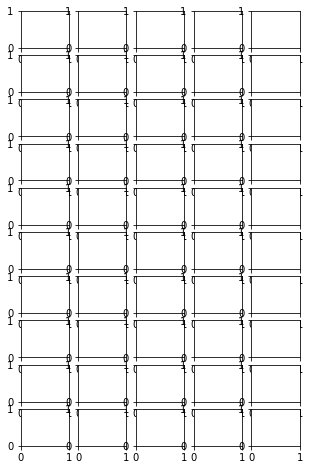

In [7]:
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))


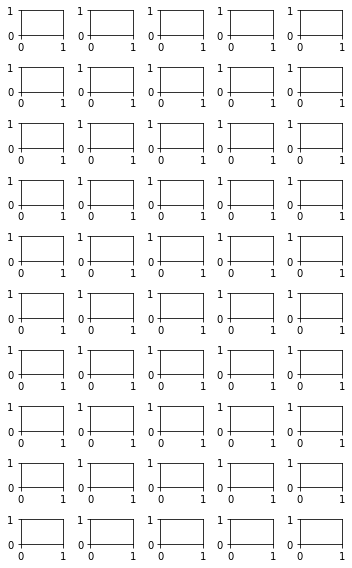

In [8]:
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


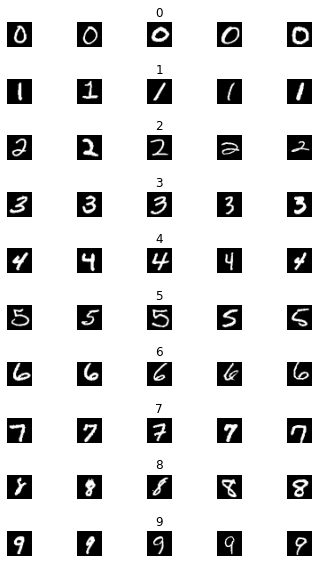

In [9]:
num_of_samples = []
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
print(num_of_samples)

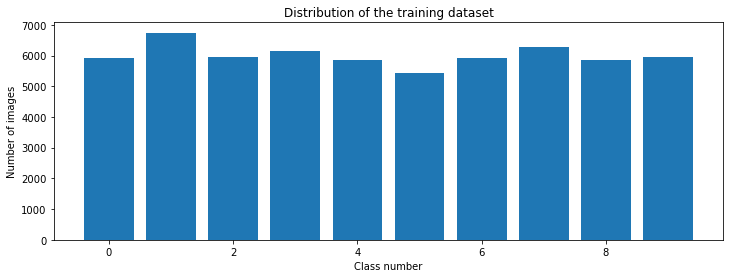

In [10]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
 
plt.show()

In [11]:
print(y_train[0])

5


In [12]:
# one hot encode the lables
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [13]:
# Normalise the data
# why 255 - > because now the maximum pixel intensity value 255 is 1 and minimum pixel intensity remains the same 0
# scales down the features to a uniform range and decreases variance in our data. Low variance data helps Neural network earn more quickly and accurately
X_train = X_train/255 
X_test = X_test/255
 


In [14]:
# flatten the array

num_pixels = 784 # 28*28 = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


In [15]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [16]:
model = create_model()
print(model.summary())
 
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.5999 - accuracy: 0.8146 - val_los

Text(0.5, 0, 'epoch')

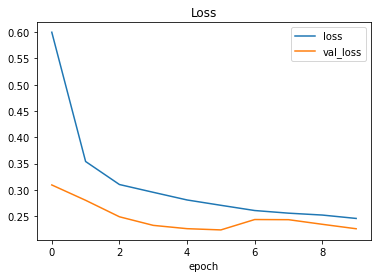

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [18]:
print(history.history)

{'val_loss': [0.3094763897359371, 0.28030817409356434, 0.24894687036673227, 0.23262160792946815, 0.22632606352368992, 0.22396706342697142, 0.2437085621058941, 0.24342861647407213, 0.23464524696270625, 0.22618405967950822], 'val_accuracy': [0.9024999737739563, 0.9193333387374878, 0.924833357334137, 0.9298333525657654, 0.9318333268165588, 0.9283333420753479, 0.9269999861717224, 0.9271666407585144, 0.9273333549499512, 0.9293333292007446], 'loss': [0.5999218566550149, 0.35408518667574285, 0.31030375140684624, 0.29551122536261876, 0.28093773827508645, 0.2707840135252034, 0.260845367886402, 0.25582395057987284, 0.2522296207646529, 0.24579532695589243], 'accuracy': [0.81461114, 0.8990741, 0.9100556, 0.9134815, 0.9187963, 0.92083335, 0.9231667, 0.9247778, 0.9252037, 0.9270741]}


Text(0.5, 0, 'epoch')

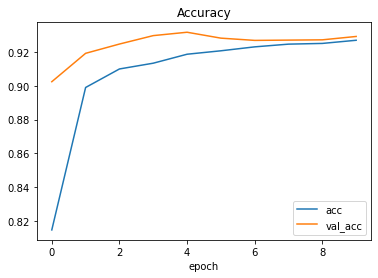

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2721169022396207
Test accuracy: 0.9194999933242798


predicted digit: [2]


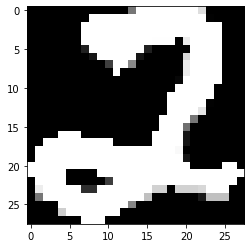

In [21]:
import requests
from PIL import Image
import cv2
 
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 

img = np.asarray(img)
img = cv2.resize(img, (28, 28)) # our network was trained on 28*28 images.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # our network was trauend  
img = cv2.bitwise_not(img) # subtracts every entry from 255 ; To make background black and digit white so as to match with the train image.
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 784)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))
